# DS Fellows Project: A 2016 Election Analysis

# By: Leron Reznikov

In this lab, we will be analyzing a dataset of polling data from the 2016 Presidential Election. If you follow politics, you may know that many polls strongly underestimated Donald Trump's performance in several key states, causing him to win the election despite many models showing it would be a Clinton victory. We will try to investigate and see if these errors are simple polling errors, or whether there were more serious miscalculations.

Let's import the required libraries and load our dataset into a variable called original_data.

In [2]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#original_data = ...
original_data = Table.read_table('presidential_polls.csv')

27

Looking at the columns, there are many different features of this data. Luckily, we are only interested in a few of them:

forecastdate: The date the forecast was uploaded to 538
adjpoll_clinton / adjpoll_trump: the adjusted/calculated percentage of people voting for each candidate
state: the state where the entry was polled
grade: The grade that the pollster has on 538, ranging from A to F with +/-

In [4]:
original_data.labels

('cycle',
 'branch',
 'type',
 'matchup',
 'forecastdate',
 'state',
 'startdate',
 'enddate',
 'pollster',
 'grade',
 'samplesize',
 'population',
 'poll_wt',
 'rawpoll_clinton',
 'rawpoll_trump',
 'rawpoll_johnson',
 'rawpoll_mcmullin',
 'adjpoll_clinton',
 'adjpoll_trump',
 'adjpoll_johnson',
 'adjpoll_mcmullin',
 'multiversions',
 'url',
 'poll_id',
 'question_id',
 'createddate',
 'timestamp')

Let's spend some time looking at data from Wisconsin - one of the more surprising results of the election. Let's load all polls that take place in Wisconsin into a variable called wisconsin.

In [6]:
# wisconsin = ...
wisconsin = original_data.where('state', 'Wisconsin')

wisconsin



cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,samplesize,population,poll_wt,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Wisconsin,10/30/2016,10/30/2016,Remington,nan,1172,lv,2.34026,46,42,4,nan,45.7114,40.1479,5.06579,nan,nan,http://20an0w2e66jla4rfm1idisr1.wpengine.netdna-cdn.com/ ...,47852,74879,10/31/16,15:09:38 1 Nov 2016
2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Wisconsin,10/18/2016,10/19/2016,Public Policy Polling,B+,804,lv,1.72999,50,38,nan,nan,47.6844,38.0076,nan,nan,nan,http://endcitizensunited.org/wp-content/uploads/2016/10/ ...,47087,73699,10/19/16,15:09:38 1 Nov 2016
2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Wisconsin,10/25/2016,10/31/2016,SurveyMonkey,C-,1195,lv,1.72919,44,42,7,nan,42.7181,41.1679,4.46675,nan,nan,https://www.surveymonkey.com/elections/map?poll=sm-lv-cps,47932,74988,11/1/16,15:09:38 1 Nov 2016
2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Wisconsin,10/6/2016,10/9/2016,Marquette University,A,878,lv,1.45761,44,37,9,nan,44.1684,39.7413,5.79541,nan,nan,https://law.marquette.edu/poll/2016/10/12/press-release- ...,46767,73136,10/12/16,15:09:38 1 Nov 2016
2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Wisconsin,10/13/2016,10/16/2016,St. Norbert College,A-,664,lv,1.40787,47,39,1,nan,46.6912,41.876,0.632046,nan,nan,http://www.snc.edu/sri/docs/2016/201610_Fall_WI_Survey_P ...,47014,73509,10/18/16,15:09:38 1 Nov 2016
2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Wisconsin,10/27/2016,10/28/2016,Emerson College,B,400,lv,1.33619,48,42,9,nan,47.5608,40.4933,8.80818,nan,nan,http://projects.fivethirtyeight.com/polls/20161029_1.pdf,47758,74741,10/29/16,15:09:38 1 Nov 2016
2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Wisconsin,10/5/2016,10/7/2016,YouGov,B,993,lv,1.15369,43,39,4,nan,43.5286,40.8773,3.34753,nan,nan,http://www.cbsnews.com/news/poll-gender-gap-in-views-on- ...,46569,72848,10/9/16,15:09:38 1 Nov 2016
2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Wisconsin,10/15/2016,10/18/2016,Monmouth University,A+,403,lv,1.14357,47,40,6,nan,45.6904,41.7381,5.09087,nan,nan,https://www.monmouth.edu/polling-institute/reports/Monmo ...,47076,73664,10/19/16,15:09:38 1 Nov 2016
2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Wisconsin,10/18/2016,10/20/2016,McLaughlin & Associates,C-,600,lv,0.981857,48,43,4,nan,47.4215,44.3646,3.05166,nan,nan,http://www.jsonline.com/story/news/politics/elections/20 ...,47463,74249,10/25/16,15:09:38 1 Nov 2016
2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/1/16,Wisconsin,10/4/2016,10/4/2016,Gravis Marketing,B-,1102,rv,0.883237,48,40,4,nan,48.7912,41.8066,2.19343,nan,nan,http://www.breitbart.com/2016-presidential-race/2016/10/ ...,46547,72780,10/7/16,15:09:38 1 Nov 2016


There are clearly many polls that take place in Wisconsin - luckily, they are in order chronologically, so we don't have to worry about sorting them. However, we should probably visualize the results in a more meaningful way. Plot the adjpoll_clinton and adjpoll_trump columns and comment on what you notice.

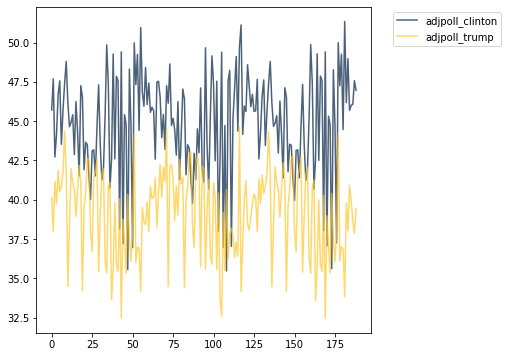

In [118]:
# wisconsin.plot(...)
 
wisconsin.plot(select=['adjpoll_clinton', 'adjpoll_trump'])


To further understand this relationship, create an array that contains the difference between the percent that voted for Clinton and those that voted for Trump. Then, run the cell below to plot this relationship.

In [7]:
# adj_diff_wisconsin = ... - ...
adj_diff_wisconsin = wisconsin['adjpoll_clinton'] - wisconsin['adjpoll_trump']


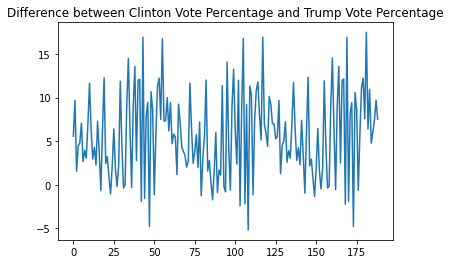

In [8]:
plt.title('Difference between Clinton Vote Percentage and Trump Vote Percentage')
plt.plot(adj_diff_wisconsin)

** Student comments here about data relationship **

Trump won Wisconsin by just under 1% in 2016. This may be surprising! Let's work on selecting only the A+, A, and A- rated pollsters, to see if they had a better take on the result. Note: you will need to use the [datascience.are.contained_in](http://data8.org/datascience/predicates.html) module. Then, plot the adjusted averages again.

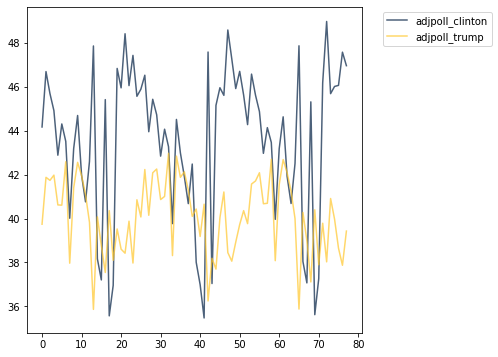

In [11]:
# high_rankings = wisconsin.where('grade', are.contained_in([...]))

high_rankings = wisconsin.where('grade', are.contained_in(['A+', 'A', 'A-']))

# high_rankings.plot(select=[...])

high_rankings.plot(select=['adjpoll_clinton', 'adjpoll_trump'])

Do you notice a significant difference depending on the rankings? Did they do a better job at predicting the true outcome of the election?

** Student Response **

# Part 2: Open Ended Analysis

1. Pick one of the following states: Pennsylvania, Ohio, Florida, Michigan
2. Perform an analysis, similar to what we did for Wisconsin, on the state. Then, look up and mark the actual result of the state.
3. Answer the following questions in some depth: 
  - What are some possible explanations for the discrepencies between the polls and the results of the election?
  - To what extent should we be trusting the polls' predictions?